In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df=pd.read_csv('../data/Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


# Missing Values

In [16]:
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

# Describe of values

In [34]:
df.shape

(1014, 7)

In [17]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [18]:
df.describe(include='object')

,RiskLevel
count,1014
unique,3
top,low risk
freq,406


# Balanced Dataset?

In [19]:
df['RiskLevel'].value_counts()

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

# Exploratory Darta Analysis

## Feature Columns

In [21]:
feature_columns=df.drop('RiskLevel',axis=1).columns.to_list()
feature_columns

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

## Target

In [23]:
target='RiskLevel'

## Boxplot

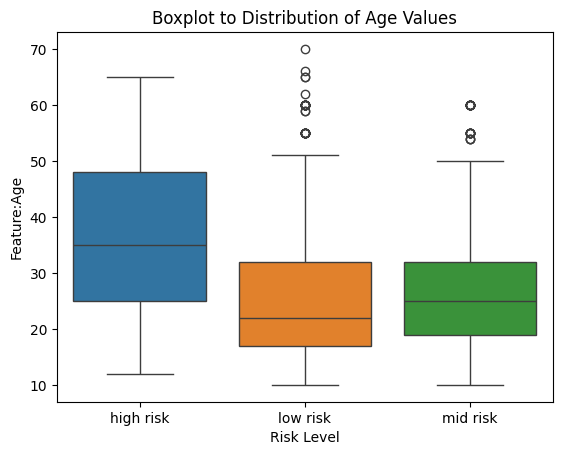

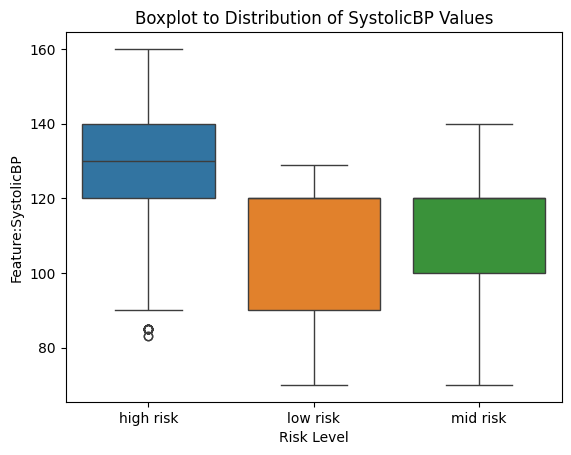

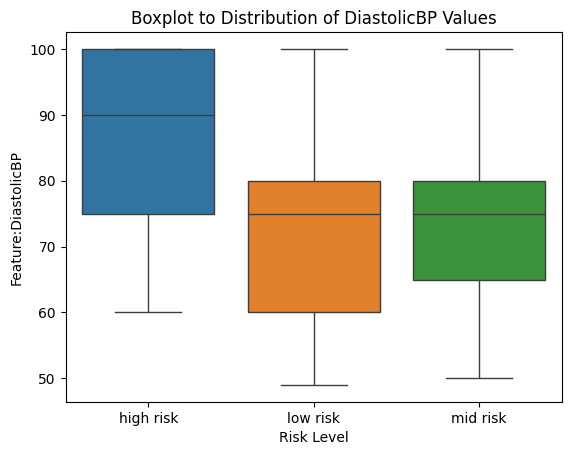

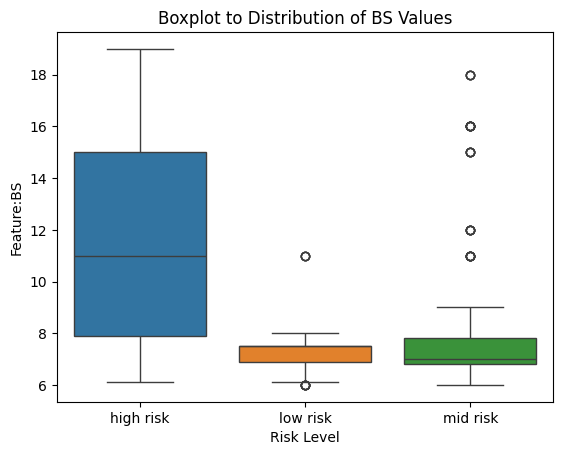

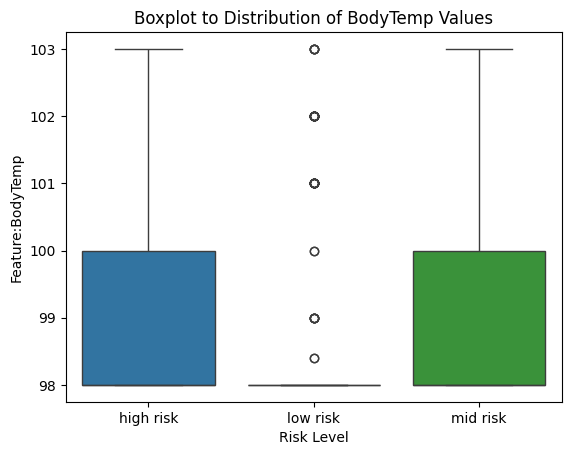

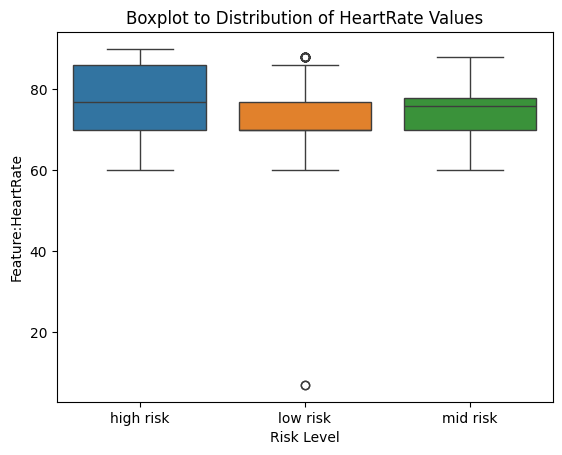

In [28]:
for column in feature_columns:
    sns.boxplot(x=target, y=column, data=df, hue=target)
    plt.xlabel("Risk Level")
    plt.ylabel(f"Feature:{column}")
    plt.title(f"Boxplot to Distribution of {column} Values")
    plt.show()

## Density Plot

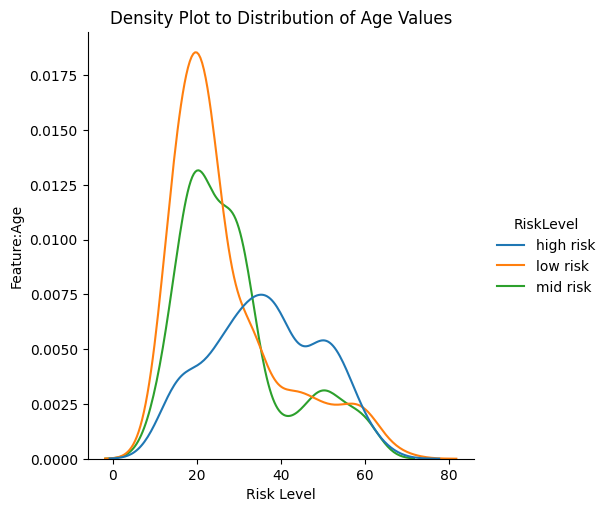

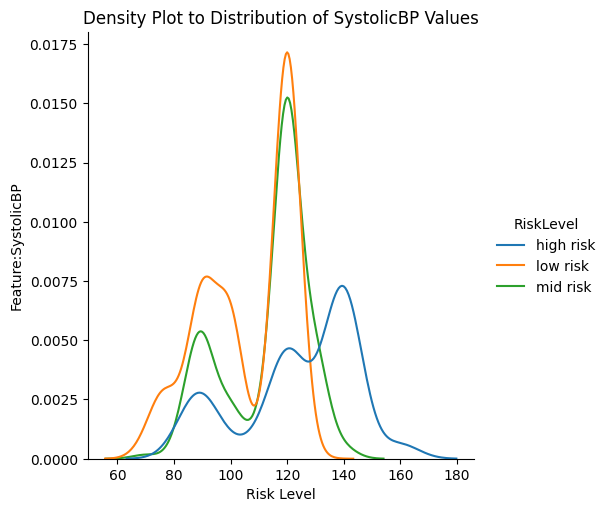

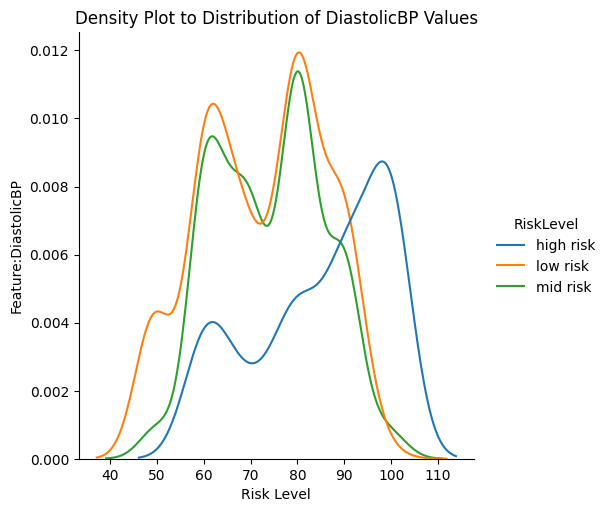

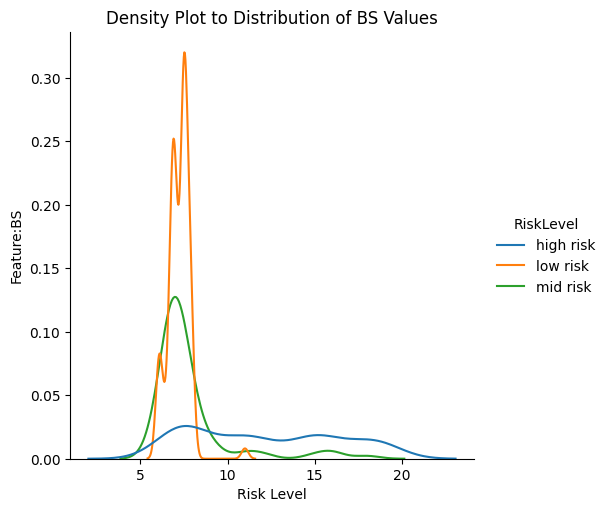

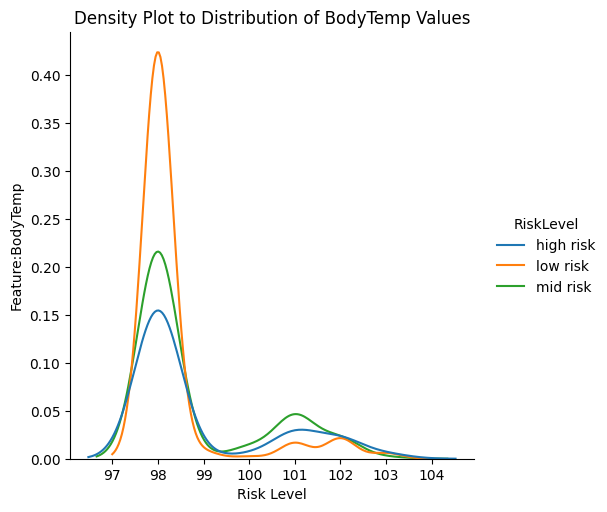

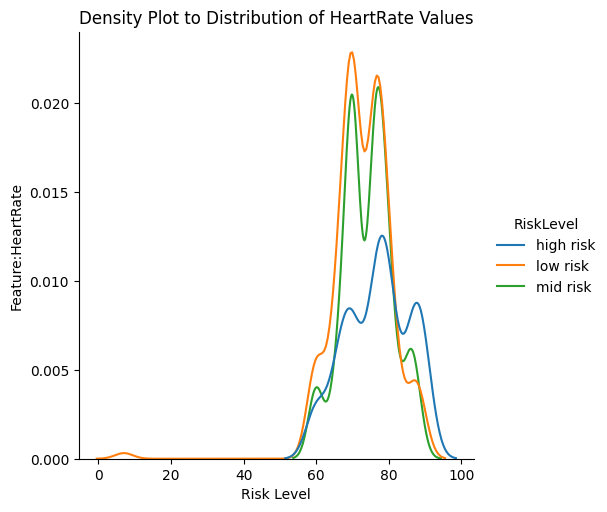

In [32]:
for column in feature_columns:
    sns.displot(x=column, data=df, hue=target, kind="kde")
    plt.xlabel("Risk Level")
    plt.ylabel(f"Feature:{column}")
    plt.title(f"Density Plot to Distribution of {column} Values")
    plt.show()

## Hypothesis Test

In [35]:
import scipy

In [38]:
normal_dist=[]
no_normal_dist=[]
for feature in feature_columns:
    normal_test_result=scipy.stats.normaltest(df[feature])
    if normal_test_result.pvalue < 0.5:
        print(f'Feature:{feature} does not follow a normal distribution.')
        no_normal_dist.append(feature)
    else:
        print(f'Feature:{feature} follow a normal distribution.')
        normal_dist.append(feature)

Feature:Age does not follow a normal distribution.
Feature:SystolicBP does not follow a normal distribution.
Feature:DiastolicBP does not follow a normal distribution.
Feature:BS does not follow a normal distribution.
Feature:BodyTemp does not follow a normal distribution.
Feature:HeartRate does not follow a normal distribution.


In [39]:
no_normal_dist,normal_dist

(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], [])

## Kruskal-Wallis 

In [52]:
import scikit_posthocs as sp 

In [58]:
#for j in target:    
scale=len(df[target].unique())
for feature in feature_columns:
    list_target=[]
    for i in range(scale):
        subset=df[(df[target]==df[target].unique()[i])][feature]
        list_target.append(subset.tolist())
                
    res = scipy.stats.mstats.kruskal(*list_target)
    print(f'The Kruskal-Wallis Test when comparing whether there is a difference between the medians of {target} with {feature} obtained a p-value of {res.pvalue}. This indicates that {"there is a difference" if res.pvalue < 0.05 else "there is no difference"} between the categories.')
    print('-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print(f'PostHoc Dunn test for feature {feature}:')
    res_posdc = sp.posthoc_dunn(list_target, p_adjust = 'bonferroni') 
    print(res_posdc.round(2)) 
    print('-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')

            

The Kruskal-Wallis Test when comparing whether there is a difference between the medians of RiskLevel with Age obtained a p-value of 3.852454380105611e-22. This indicates that there is a difference between the categories.
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
PostHoc Dunn test for feature Age:
     1     2     3
1  1.0  0.00  0.00
2  0.0  1.00  0.08
3  0.0  0.08  1.00
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The Kruskal-Wallis Test when comparing whether there is a difference between the medians of RiskLevel with SystolicBP obtained a p-value of 8.599404959533086e-37. This indicates that 